<a href="https://colab.research.google.com/github/Daria-Mihaila-1/Climate-Change-in-Europe-based-On-Energy-Production-Regression/blob/main/Energy_Production_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
drive.flush_and_unmount()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

df = pd.read_csv("/content/drive/MyDrive/data/owid-energy-data.csv")
print(df.columns)

#form an idea about how many columns out of the whole csv contain nan values
column_idx = -1
count = 0
for column in df:
  column_idx += 1
  if df[column].isnull().values.any():
    count += 1
    continue

print(f"{count}/{len(df.columns)} columns containing Nan")
print(len(df.columns))

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)
127/129 columns containing Nan
129


In [ ]:
# See the columns in .csv file
for col in df.columns:
  print(col)

country
year
iso_code
population
gdp
biofuel_cons_change_pct
biofuel_cons_change_twh
biofuel_cons_per_capita
biofuel_consumption
biofuel_elec_per_capita
biofuel_electricity
biofuel_share_elec
biofuel_share_energy
carbon_intensity_elec
coal_cons_change_pct
coal_cons_change_twh
coal_cons_per_capita
coal_consumption
coal_elec_per_capita
coal_electricity
coal_prod_change_pct
coal_prod_change_twh
coal_prod_per_capita
coal_production
coal_share_elec
coal_share_energy
electricity_demand
electricity_generation
electricity_share_energy
energy_cons_change_pct
energy_cons_change_twh
energy_per_capita
energy_per_gdp
fossil_cons_change_pct
fossil_cons_change_twh
fossil_elec_per_capita
fossil_electricity
fossil_energy_per_capita
fossil_fuel_consumption
fossil_share_elec
fossil_share_energy
gas_cons_change_pct
gas_cons_change_twh
gas_consumption
gas_elec_per_capita
gas_electricity
gas_energy_per_capita
gas_prod_change_pct
gas_prod_change_twh
gas_prod_per_capita
gas_production
gas_share_elec
gas_share

In [ ]:
#clean the dataframe
# Drop iso_code since it is not a consistent column and not relevant to task
df = df.drop("iso_code", axis=1, errors='ignore')
original_number_of_rows = len(df)
print(f"Total number of rows in original dataframe: {original_number_of_rows}")

Total number of rows in original dataframe: 21590


In [ ]:

df["gdp"] = pd.to_numeric(df["gdp"], errors='coerce')  # This will convert non-numeric "gdp" values to NaN (the actual NaN value, not the string "NaN")
#check the number of countries in the ds that have a gdp value to see if you have enough data to work with regarding gpd
unique_countries = df["country"].unique()
unique_countries_with_gdp = df.loc[df["gdp"].notna(), "country"].unique()

# check the number of values for europe
rows_with_europe = df[df["country"].str.contains('Europe')]

european_countries = np.array([
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
    'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
    'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
    'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
    'United Kingdom', 'Vatican City'
])

# Get all european countries out of the dataframe
df_european_countries = df[df["country"].str.contains('|'.join(european_countries))]
df_european_countries.fillna(0)

# Remove rows of countries that are not near the european continent or represent only parts of countries
countries_to_delete = ['West Germany', 'Netherlands Antilles', 'East Germany']
df_european_countries = df_european_countries[~df_european_countries["country"].isin(countries_to_delete)]

# We have Serbia and Serbia and Montenegro in the dataset so assume the values are also relatable for Montenegro
df_european_countries["country"] = df_european_countries['country'].replace('Serbia and Montenegro', 'Montenegro')
countries = df_european_countries["country"].unique()
print(countries)
remaining_countries = np.setdiff1d(european_countries, countries)

print(f"European Countries number that are present in dataset:{len(countries)}\nEuropean countries total:{len(european_countries)}\n countries left: {remaining_countries} are not present")

#check the average min year of recordance
unique_countries_df = pd.DataFrame(df_european_countries.drop_duplicates("country"))

# We are going to turn our attention at the recordings ~ after the year 2000
df_european_countries = df_european_countries[df_european_countries["year"]>=1995]

print(f"Number of remaining rows after removing the recordings before 1995: {len(df_european_countries)}")

['Albania' 'Austria' 'Belarus' 'Belgium' 'Bosnia and Herzegovina'
 'Bulgaria' 'Croatia' 'Cyprus' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russia' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Ukraine' 'United Kingdom']
European Countries number that are present in dataset:40
European countries total:46
 countries left: ['Andorra' 'Czech Republic' 'Liechtenstein' 'Monaco' 'San Marino'
 'Vatican City'] are not present
Number of remaining rows after removing the recordings before 1995: 1120


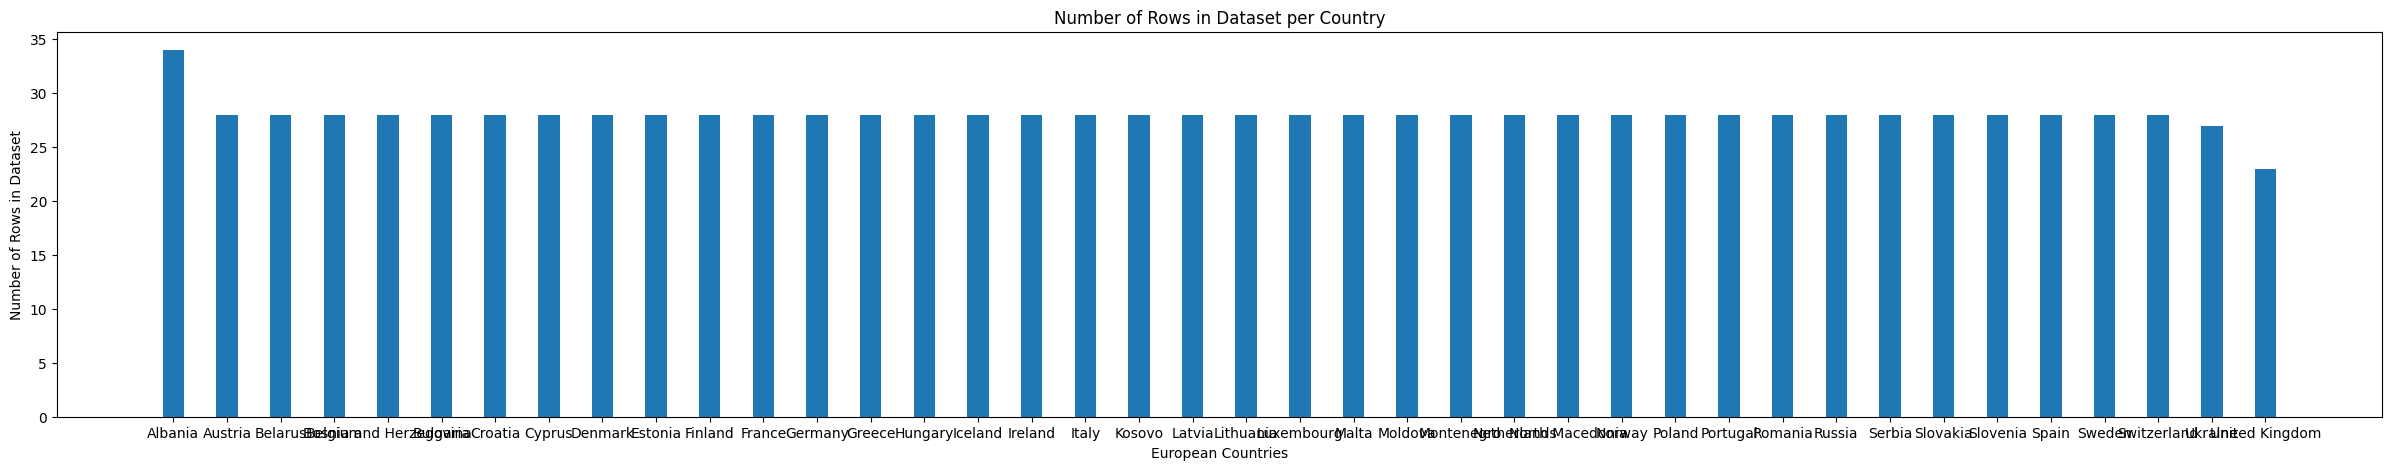

In [ ]:
rows_per_country = df_european_countries["country"].value_counts()

fig = plt.figure(figsize = (30, 5))
plt.bar(countries, rows_per_country, width = 0.4)
plt.xlabel("European Countries")
plt.ylabel("Number of Rows in Dataset")
plt.title("Number of Rows in Dataset per Country")
plt.show()

In [ ]:
df_european_countries.head(4)
unique_countries_df = pd.DataFrame(df_european_countries.drop_duplicates("country"))

avg_earliest_recordings = sum(unique_countries_df["year"])/len(unique_countries_df)
print("average ",avg_earliest_recordings )

print(max(unique_countries_df["year"]))

nan_counts = df_european_countries.isna().sum()
columns_to_exclude = ['country', 'year', 'population']

# Count NaN values in each column, excluding specified columns
nan_counts = df_european_countries.drop(columns=columns_to_exclude).isna().sum()

# Get the column with the least NaN values
column_least_nan = nan_counts.idxmin()
# Get the column itself
column_least_nan_values = df_european_countries[column_least_nan]

print("Column with the least NaN values:", column_least_nan)
print("Values of the column:")
print(column_least_nan_values)
 # So we get that the electricity_generation has the least NaN values

average  1995.25
2000
Column with the least NaN values: electricity_generation
Values of the column:
602        4.47
603        5.99
604        5.23
605        5.11
606        5.42
          ...  
20155    332.73
20156    323.89
20157    312.02
20158    308.65
20159    326.09
Name: electricity_generation, Length: 1120, dtype: float64


In [ ]:
filtered_columns = [col for col in df_european_countries.columns if "consumption" in col ]
print(filtered_columns)
print(len(filtered_columns))
production_columns = [col for col in df_european_countries.columns if "production" in col]
print(len(production_columns))
print(production_columns)
generation_columns = [col for col in df_european_countries.columns if "generation" in col]
print(generation_columns)
for pr in production_columns:
  print(df_european_countries[pr].isna().sum())

print(len(df_european_countries))


['biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'primary_energy_consumption', 'renewables_consumption', 'solar_consumption', 'wind_consumption']
13
3
['coal_production', 'gas_production', 'oil_production']
['electricity_generation']
198
204
228
1120


In [ ]:
production_columns_full = production_columns + [item for item in generation_columns if item not in production_columns]
european_production_df = pd.DataFrame(df_european_countries[["country","year", "population", "gdp"] + production_columns_full])
print(european_production_df.columns)

# Get rows with NaN values
rows_with_nan = european_production_df[european_production_df.isna().any(axis=1)]

print("Rows with NaN values:")
print(rows_with_nan.head(3))

# Fill in the NaN fields for production columns with 0 in dataframe
european_production_df[production_columns_full] = european_production_df[production_columns_full].fillna(0)


Index(['country', 'year', 'population', 'gdp', 'coal_production',
       'gas_production', 'oil_production', 'electricity_generation'],
      dtype='object')
Rows with NaN values:
     country  year  population           gdp  coal_production  gas_production  \
624  Albania  2017   2879361.0  3.267876e+10              NaN             NaN   
625  Albania  2018   2877019.0  3.400911e+10              NaN             NaN   
626  Albania  2019   2873883.0           NaN              NaN             NaN   

     oil_production  electricity_generation  
624             NaN                    4.48  
625             NaN                    8.47  
626             NaN                    5.17  


<class 'pandas.core.frame.DataFrame'>


<ipython-input-109-2c6f8ea833e7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averaged_european_production_per_year_df =  df_filtered.groupby(['year']).mean().reset_index()


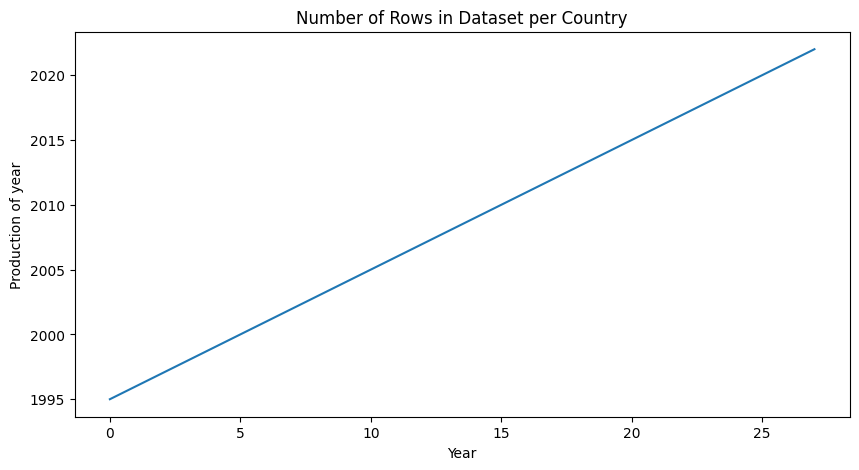

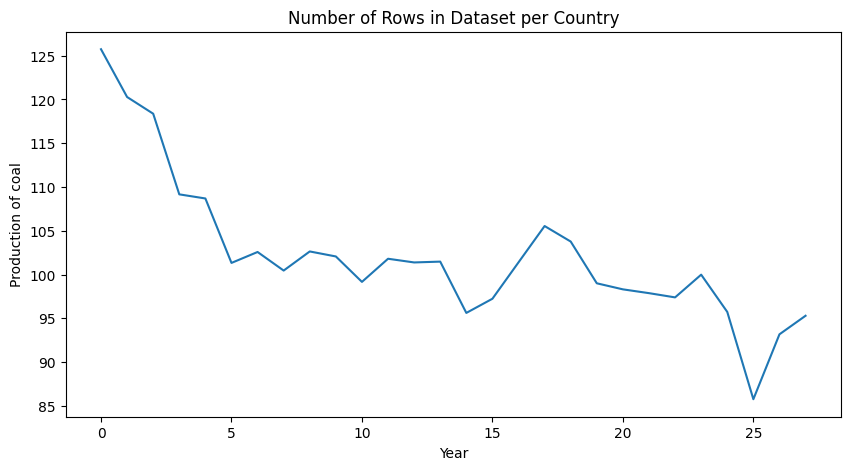

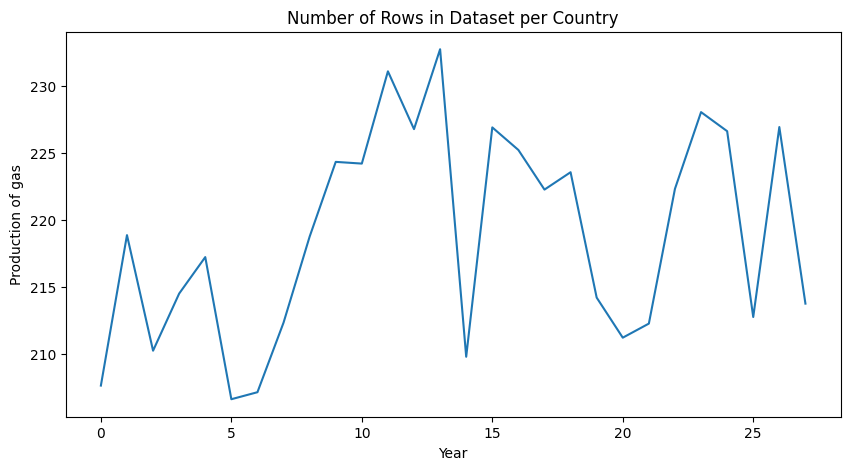

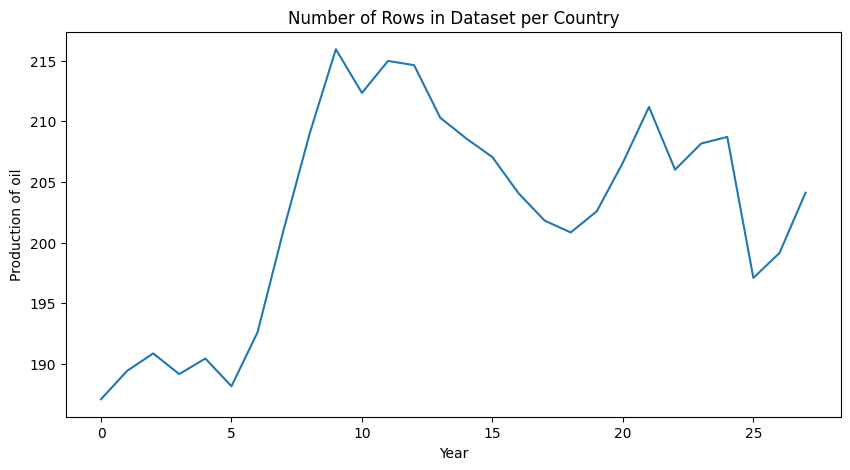

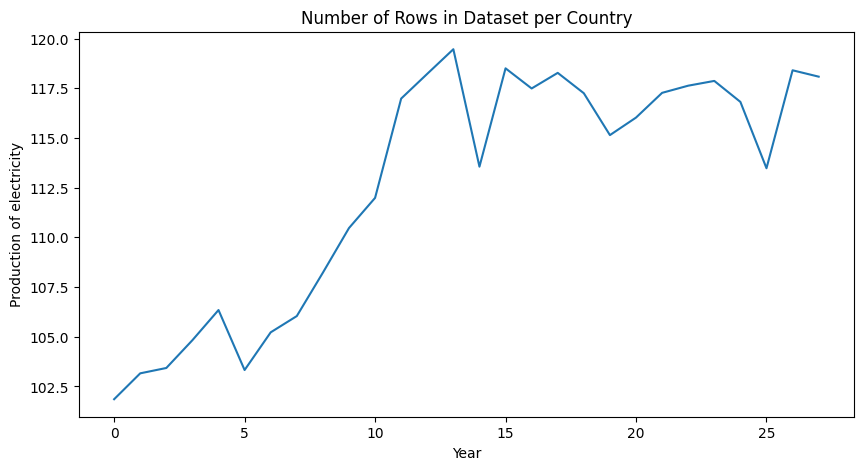

In [ ]:
# Generate year average for all european countries in energy production
df_filtered = european_production_df[["country","year", "coal_production", "gas_production", "oil_production", "electricity_generation"]]
averaged_european_production_per_year_df =  df_filtered.groupby(['year']).mean().reset_index()
print(type(averaged_european_production_per_year_df))


# Plot the energy production per year
production = [column.values.tolist() for _, column in averaged_european_production_per_year_df.items()]
min_year = averaged_european_production_per_year_df.index.min()
max_year = averaged_european_production_per_year_df.index.max()
year = list(range(min_year, max_year + 1))

for i, p in enumerate(production):

  fig = plt.figure(figsize = (10, 5))

  plt.plot(year, p)
  plt.xlabel("Year")
  fuel_name = averaged_european_production_per_year_df[averaged_european_production_per_year_df.columns[i]].name.split("_")[0]
  plt.ylabel(f"Production of {fuel_name}")
  plt.title("Number of Rows in Dataset per Country")



In [ ]:
# df = df.rename(columns={'old_name': 'new_name', 'old_age': 'new_age'})
averaged_european_production_per_year_df = averaged_european_production_per_year_df.rename(columns={'year':'Year'})
averaged_european_production_per_year_df

,Year,coal_production,gas_production,oil_production,electricity_generation
0,1995,125.730128,207.648333,187.082718,101.858154
1,1996,120.272154,218.867692,189.422000,103.160487
2,1997,118.364128,210.250769,190.862615,103.429744
3,1998,109.153974,214.509769,189.155821,104.828154
4,1999,108.683000,217.229462,190.441128,106.344564
5,2000,101.323561,206.631951,188.153341,103.326585
6,2001,102.570951,207.155463,192.608561,105.222927
7,2002,100.449512,212.341317,201.063439,106.040732
8,2003,102.632244,218.754951,209.018439,108.224878
9,2004,102.061341,224.328659,215.950000,110.468293


We can tell that every "fuel" type besides coal has increased in production since 1995
Now let's see how the temperatures in the winter months have been since 1995

In [ ]:
temperatures_df = pd.read_csv("/content/drive/MyDrive/data/GlobalLandTemperaturesByCountry.csv")
temperatures_df.head(10)
temperatures_df["dt"] = pd.to_datetime(temperatures_df["dt"])

# Clean the dataset to only contain temperatures from 1995+ for each country
# Filter rows where the year is lower than 2023
filtered_temperatures_df = temperatures_df[temperatures_df["dt"].dt.year.between(1995, 2023)]

filtered_temperatures_df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
3014,1995-01-01,-0.866,0.365,Åland
3015,1995-02-01,0.909,0.644,Åland
3016,1995-03-01,1.167,0.318,Åland


In [ ]:
# Filter out the countries that are not in the energy production dataset

# Check the countries that are not in the temperatures dataset but are in the energy production dataset
country_difference = list(set(european_production_df["country"].unique()) - set(filtered_temperatures_df["Country"].unique()))
print(country_difference)

# ['North Macedonia', 'Bosnia and Herzegovina', 'Kosovo'] are missing from the dataset

# Bosnia and Herzegovina is written as "Bosnia And Herzegovina" --> modify it to have a lower case A in "and"
filtered_temperatures_df.loc[filtered_temperatures_df["Country"] == "Bosnia And Herzegovina","Country"] = "Bosnia and Herzegovina"

# North Macedonia is mentioned as "Macedonia" --> modify Country column values to be "North Macedonia"
filtered_temperatures_df.loc[filtered_temperatures_df["Country"] == "Macedonia","Country"] = "North Macedonia"

# Kosovo is seen as closely related to Serbia( being part of Serbia until 2008) so we will take Kosovo's temperatures as Serbia's

# Kosovo does not have energy production recordings before 2000  + the energy production after 2000 is low so we will erase Kosovo out of european_production_df and keep only Serbia as a representative for both
european_production_df = european_production_df.drop(european_production_df[european_production_df["country"] == "Kosovo"].index)
print("Kosovo rows left:\n",european_production_df[european_production_df["country"] == "Kosovo"], "\n")

# Filter out countries that are in both energy production dataset and temperatures dataset
mask = filtered_temperatures_df["Country"].isin(european_production_df["country"].unique())
filtered_country_temperatures_df = filtered_temperatures_df[mask]

print("Remaining Countries in temperature dataset:\n",filtered_country_temperatures_df["Country"].unique())

new_country_difference = list(set(european_production_df["country"].unique()) - set(filtered_country_temperatures_df["Country"].unique()))
print("\nThe new difference of countries between datasets:\n",new_country_difference)

['Bosnia and Herzegovina', 'North Macedonia', 'Kosovo']
Kosovo rows left:
 Empty DataFrame
Columns: [country, year, population, gdp, coal_production, gas_production, oil_production, electricity_generation]
Index: [] 

Remaining Countries in temperature dataset:
 ['Albania' 'Austria' 'Belarus' 'Belgium' 'Bosnia and Herzegovina'
 'Bulgaria' 'Croatia' 'Cyprus' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia'
 'Lithuania' 'Luxembourg' 'North Macedonia' 'Malta' 'Moldova' 'Montenegro'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Russia' 'Serbia'
 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom']

The new difference of countries between datasets:
 []


In [ ]:
# Average the monthly temperatures to yearly temperatures for the gathered european countries
# Date column "dt" is of type TimeStamp

# Extract year from the date column and create a new column "year"
# Using loc to avoid Warning:"A value is trying to be set on a copy of a slice from a DataFrame."
filtered_country_temperatures_df.loc[:,"Year"] = filtered_country_temperatures_df["dt"].dt.year
print(filtered_country_temperatures_df.columns)
# Average the values of the AverageTemperature after grouping the values after Country and "year" column
average_country_temperatures_df = filtered_country_temperatures_df.groupby(["Country","Year"])["AverageTemperature"].mean()

# Reset index from multiindex ["Country" "year"] to ["Country", "year", "AverageTemperature"]
average_country_temperatures_df = average_country_temperatures_df.reset_index()

# Rename the temperature column to 'AnnualTemperature' on current df without creating extra copy
average_country_temperatures_df.rename(columns={"AverageTemperature":"Annual Mean"}, inplace=True)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country',
       'Year'],
      dtype='object')


<ipython-input-113-fd3b3d081422>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_country_temperatures_df.loc[:,"Year"] = filtered_country_temperatures_df["dt"].dt.year


We now have an average per year for each European country in our dataset

In [ ]:
# See what country does not have temperatures from the years in the wanted interval [1995,2022]
# Get the maximum date of each country to analyze the years
latest_temp_dates = average_country_temperatures_df.groupby("Country")["Year"].max()
# Temperatures recordings go until 2013

earliest_temp_dates =  average_country_temperatures_df.groupby("Country")["Year"].min()
print("\n****************Earliest:\n",earliest_temp_dates)



****************Earliest:
 Country
Albania                   1995
Austria                   1995
Belarus                   1995
Belgium                   1995
Bosnia and Herzegovina    1995
Bulgaria                  1995
Croatia                   1995
Cyprus                    1995
Denmark                   1995
Estonia                   1995
Finland                   1995
France                    1995
Germany                   1995
Greece                    1995
Hungary                   1995
Iceland                   1995
Ireland                   1995
Italy                     1995
Latvia                    1995
Lithuania                 1995
Luxembourg                1995
Malta                     1995
Moldova                   1995
Montenegro                1995
Netherlands               1995
North Macedonia           1995
Norway                    1995
Poland                    1995
Portugal                  1995
Romania                   1995
Russia                    1995
Ser

In [147]:

'''
Data source : https://climateknowledgeportal.worldbank.org/country
'''

def add_missing_year_information(additional_data_folder, average_country_temperatures_df):

  additional_data_list = os.listdir(additional_data_folder)
  if ".ipynb_checkpoints" in additional_data_list:
    additional_data_list.remove(".ipynb_checkpoints")
  final_df = average_country_temperatures_df[["Country", "Year", "Annual Mean"]].copy()


  for f in additional_data_list:
    # Create full path for file
    file_path = os.path.join(additional_data_folder, f)

    # Read from .csv file
    temp_df = pd.read_csv(file_path, usecols=lambda column: column in ['Category', 'Annual Mean'])
    # print(file_path)
    # Clean dataset to only have wanted dates [latest_temp_dates["Estonia"] - 2023-01-01]

    # Get country whose .csv dataset it is
    country = f.split("_")[-1].removesuffix(".csv")
    # "Category" is column for year --> convert it into int to handle dataframe with ease
    temp_df["Category"] = temp_df["Category"].astype(int)
    temp_df.rename(columns={"Category":"Year"}, inplace=True)
    # Check the case in which the country contains multiple words --> divided by "-" in file name
    if "-" in country:
      country = country.replace("-", " ")

    temps_filtered = temp_df[(latest_temp_dates[country] < temp_df["Year"]) & (temp_df["Year"] < 2023)]
    temps_filtered["Country"] = country
    # print(temps_filtered, country)
    final_df = pd.concat([final_df,temps_filtered], ignore_index=True)
    # print(len(final_df))
  # print(final_df[final_df["Country"]=="Germany"]["Year"])
  return final_df
additional_data_folder = "/content/drive/MyDrive/data/additional_temperatures_data"
final_average_country_temperatures_df = add_missing_year_information(additional_data_folder, average_country_temperatures_df)

<ipython-input-147-ce3f622b79d8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_filtered["Country"] = country
<ipython-input-147-ce3f622b79d8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_filtered["Country"] = country


In [149]:
# Figure out what columns to use for the SWM
# result = pd.DataFrame(final_average_country_temperatures_df[final_average_country_temperatures_df["Country"] == "Germany"]).merge( european_production_df,on='Year')
# print(pd.DataFrame(final_average_country_temperatures_df[final_average_country_temperatures_df["Country"] == "Germany"])["Year"])
# averaged_european_production_per_year_df["Year"]

We have a dataset of temperatures of form:
Country Year Annual Mean

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, y_train, X_val, y_val = train_test_split()

regr = svm.SVR()
